<a href="https://colab.research.google.com/github/m-aliabbas/Pneumonia-Train-Models-/blob/master/RandomForestThesis1Res34.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Loading  and Libraries Import

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls '/content/drive/My Drive/PreTrainModels/'

dataset123.csv	datasetRes34.csv


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Importing the dataset


# Preprocessing Data

In [0]:
dataset = pd.read_csv('/content/drive/My Drive/PreTrainModels/datasetRes34.csv')
dataset = pd.get_dummies(dataset)

In [0]:
dataset.shape

(3680, 513)

In [0]:
labels = np.array(dataset['label'])

In [0]:
dataset= dataset.drop('label', axis = 1)

In [0]:
feature_list = list(dataset.columns)

In [0]:
features = np.array(dataset)

In [0]:
features.shape

(3680, 512)

# Splitting to train and Test Set

In [0]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.11, random_state = 123)

In [0]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (3275, 512)
Training Labels Shape: (3275,)
Testing Features Shape: (405, 512)
Testing Labels Shape: (405,)


# Training Random Forest Classifier

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
train_features = sc.fit_transform(train_features)  
test_features = sc.transform(test_features)  
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
clf1 = RandomForestClassifier(n_estimators=1000, max_depth=12,random_state=42,oob_score=True,min_weight_fraction_leaf=0.15)
# Train the model on training data
clf1.fit(train_features, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=12, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.15, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

# Testing on Unseen Data

In [0]:
from sklearn.metrics import confusion_matrix
conf=confusion_matrix(test_labels, clf1.predict(test_features));
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(test_labels, clf1.predict(test_features)))  
print(classification_report(test_labels, clf1.predict(test_features)))  
print(accuracy_score(test_labels, clf1.predict(test_features)))  

[[177   6]
 [  5 217]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       183
           1       0.97      0.98      0.98       222

    accuracy                           0.97       405
   macro avg       0.97      0.97      0.97       405
weighted avg       0.97      0.97      0.97       405

0.9728395061728395


In [0]:
conf

array([[177,   6],
       [  5, 217]])

# Metrics

Calculating Values according to
$$ Recall = \frac{TruePositive}{TruePositive+False Nagitive}=0.9752808988764046$$
$$ Precision = \frac{TruePositive}{TruePositive+FalsePositive}$$
$$F1 = \frac{2 \cdot precision\cdot recall}{precision+ recall}$$

In [0]:
TrueNagitive=conf[0][0]
FalseNegative=conf[0][1]
TruePositive=conf[1][1]
FalsePositive=conf[1][0]
recal=TruePositive/(TruePositive+FalseNegative)
precision=TruePositive/(TruePositive+FalsePositive)
print("Precision of Model =",precision,"Recall of Model ", recal)
f1=2*((precision*recal)/(precision+recal))
print('F1 Score of Model =',f1)

Precision of Model = 0.9774774774774775 Recall of Model  0.9730941704035875
F1 Score of Model = 0.9752808988764046


In [0]:
prob=clf1.predict_proba(test_features)

In [0]:
from sklearn.metrics import roc_curve, auc
# probs from log preds
probs = np.exp(prob[:,1])
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(test_labels, probs, pos_label=1)

# Compute ROC area
roc_auc = auc(fpr, tpr)
print('ROC area is {0}'.format(roc_auc))

ROC area is 0.9954462659380692


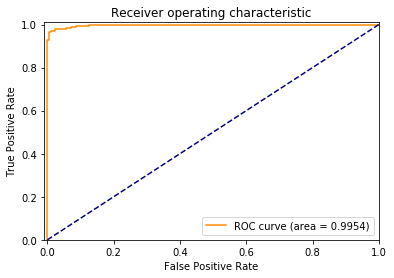

In [0]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

Automatically created module for IPython interactive environment


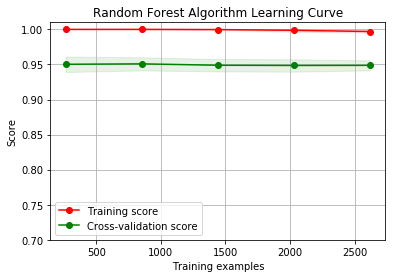

In [0]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt





title = "Random Forest Algorithm Learning Curve"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

estimator = RandomForestClassifier(n_estimators=500, max_depth=10,random_state=1234)
plot_learning_curve(estimator, title, train_features, train_labels, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

plt.show()